# **Final Group Project Report**
## Title: Predicting Existence of Heart Disease
Group 8

Team members: Mireia Fortuno Ledesma, Steve He, Karry Jiang, Ashine Zhang

## **Introduction**
Heart disease is a subset of cardiovascular diseases, the global leading cause of death. From the Framingham Heart Study, many different factors, such as age, are found to be correlated with heart disease. 

The question we will answer with this project is: Can we predict whether someone will be diagnosed with heart disease (Healthy or Diagnosed) based on `age`, `thalach`, and `oldpeak`? 

The dataset used is "Heart Disease" Data Set, consisting of 14 attributes: 
* `age` (in years)
* `sex` (1 = male; 0 = female)
* `cp`: Chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
* `trestbps`: resting blood pressure (mmHg)
* `chol`: serum cholesterol (mg/dl)
* `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
* `restecg`: resulting electrocardiographic results
* `thalach`: maximum heart rate achieved 
* `exang`: exercise induced angina (1= yes; 0= no)
* `oldpeak`: ST depression induced by exercise relative to rest
*  `slope`: slope of peak exercise ST segment
    - Value 1: upsloping = 3
    - Value 2: flat = 2
    - Value 3: downsloping = 1
* `ca`: number of major vessels (0, 1, 2, 3)
* `thal`: 
    - Value 3 = normal
    - Value 6 = fixed defect
    - Value 7 = reversible defect
* `num`: diagnosis of heart disease
    - Value 0: Healthy, <50% diameter narrowing
    - Value 1: Diagnosed with stage 1, >50% diameter narrowing
    - Value 2: Diagnosed with stage 2, >50% diameter narrowing
    - Value 3: Diagnosed with stage 3, >50% diameter narrowing
    - Value 4: Diagnosed with stage 4, >50% diameter narrowing


## **Methods & Results**

### Reading and cleaning the data

In [20]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

## set a seed for reproducibility
set.seed(1111)

In this following cells we perform 5 steps:

* We read the data directly from the internet into this R notebook.
* Since the data doesn't have columns' names, we explicitly write the names from the information we find in https://archive.ics.uci.edu/ml/datasets/Heart+Disease.
* We remove rows which have null values by filtering. In this case null values are represented as "?", and we know that ca and thal have null values.
* We change the data type of some of the variables since in the webpage mentioned above we can see that some variables should be categorical, as they only have a few possible values.
* We create a new variable from num called target. Instead of having different values of diagnosed (num = 1, 2, 3 or 4) we just consider if the person has been diagnosed with a heart disease or not.

In [21]:
## read the data from the url where the data comes from, display the first 10 un-wrangled observations

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data_original <- read_csv(url)
head(data_original, 10)

Warning message:
“Duplicated column names deduplicated: '1.0' => '1.0_1' [3], '1.0' => '1.0_2' [6], '0.0' => '0.0_1' [12]”
Parsed with column specification:
cols(
  `63.0` = col_double(),
  `1.0` = col_double(),
  `1.0_1` = col_double(),
  `145.0` = col_double(),
  `233.0` = col_double(),
  `1.0_2` = col_double(),
  `2.0` = col_double(),
  `150.0` = col_double(),
  `0.0` = col_double(),
  `2.3` = col_double(),
  `3.0` = col_double(),
  `0.0_1` = col_character(),
  `6.0` = col_character(),
  `0` = col_double()
)



63.0,1.0,1.0_1,145.0,233.0,1.0_2,2.0,150.0,0.0,2.3,3.0,0.0_1,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


This table represent the loaded raw data from "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [22]:
## read the data inputing the column names we know from the data source, and tidy the dataset

data <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
                                    "exang", "oldpeak", "slope", "ca", "thal", "num")) %>%
        filter(ca != "?" & thal != "?") %>%
        mutate(sex = as.factor(sex), cp = as.factor(cp), fbs = as.factor(fbs), restecg = as.factor(restecg),
               exang = as.factor(exang), slope = as.factor(slope), thal = as.factor(thal), num = as.factor(num),
               ca = as.factor(ca),
               target = ifelse(num==0, "Healthy", "Diagnosed"), target = as.factor(target))
        

head(data, 10)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Healthy
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Diagnosed
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Diagnosed
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Healthy
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Healthy
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,Healthy
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,Diagnosed
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,Healthy
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,Diagnosed


This table contains the same data as the previous table, excluding the ? values, changes whole number observations to factors, and add a new column of target based on observations in column num. It also now added human interpretable column names.

### Splitting data into Train and Test

For the next part, we want to explore our dataset, but only the training dataset. Therefore we first will split the data into 2 sub-datasets. We will use 75% of our data for training and the variable we want to classify is `target`. 

From the textbook and literature, we know that typically, the training set size is between 50% and 95% of the data. We want to trade off between training an accurate model (by using a larger training set) and getting an accurate evaluation of the performance (by using a larger test set). Therefore, we use 75% of the data for training, and 25% for testing since its a value in the middle of the typically used sizes.

In [23]:
## split whole dataset into training and testing datasets, display first 5 obersvations for each one

data_split <- initial_split(data, prop = 0.75, strata = target)  
data_train <- training(data_split)   
data_test <- testing(data_split)

head(data_train, 5)
head(data_test, 5)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Healthy
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Diagnosed
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Healthy
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,Diagnosed
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,Healthy


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Diagnosed
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Healthy
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,Healthy
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0,Healthy
49,1,2,130,266,0,0,171,0,0.6,1,0.0,3.0,0,Healthy


The first table is a portion of the training data, the second is a portion of the testing data.

Now we can see the size we originally had from the whole dataset, as well as the size of the training dataset and the test dataset.

In [24]:
## show sizes of original dataset, training dataset and testing dataset

data_rows <- nrow(data)
train_rows <- nrow(data_train)
test_rows <- nrow(data_test)

data_rows
train_rows
test_rows

[1] 297

[1] 223

[1] 74

Before training the model, we need to ensure that the training and testing sets are balanced, because classification may not perform well when classes are imbalanced.

In [25]:
## display for each dataset the percentage of each target label

balance_train <- group_by(data_train, target) %>%  
    summarize(count = n(), percentage = count / train_rows * 100)
balance_test <- group_by(data_test, target) %>%  
    summarize(count = n(), percentage = count / test_rows * 100)

balance_train
balance_test

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



target,count,percentage
<fct>,<int>,<dbl>
Diagnosed,103,46.18834
Healthy,120,53.81166


target,count,percentage
<fct>,<int>,<dbl>
Diagnosed,34,45.94595
Healthy,40,54.05405


We can see that the percentage of Diagnosed and Healthy in the training and testing data sets are pretty similar, 46.2% and 45.9% for Diagnosed, 53.8% and 54.1% for Healthy. It is clear that the two data sets are balanced and can be used for building the model.

### Training Data Summary Table
We perform an exploratory data analysis of the data and show it in a table format. The table reports the number of healthy and diagnosed cases, the means of the predictor variables we plan to use in the analysis and similar characteristics that patients in each case exhibit. 

In [26]:
## study the datatypes of each variable and the different possible values
str(data_train)

tibble [223 × 15] (S3: tbl_df/tbl/data.frame)
 $ age     : num [1:223] 63 67 41 62 57 63 53 57 56 44 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 2 4 4 4 4 4 3 2 ...
 $ trestbps: num [1:223] 145 160 130 140 120 130 140 140 130 120 ...
 $ chol    : num [1:223] 233 286 204 268 354 254 203 192 256 263 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 2 1 2 1 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 3 1 3 3 1 3 1 ...
 $ thalach : num [1:223] 150 108 172 160 163 147 155 148 142 173 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 2 1 2 1 ...
 $ oldpeak : num [1:223] 2.3 1.5 1.4 3.6 0.6 1.4 3.1 0.4 0.6 0 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 1 3 1 2 3 2 2 1 ...
 $ ca      : Factor w/ 4 levels "0.0","1.0","2.0",..: 1 4 1 3 1 2 1 1 2 1 ...
 $ thal    : Factor w/ 3 levels "3.0","6.0","7.0": 2 1 1 1 1 3 3 2 2 3 ...
 $ num     : Factor w/ 5 levels "0","1","2","3",..: 1 3 1 4 1 

In [27]:
## study the mean values for each of the target labels and the majority value in case of categorical variables

EDA_data <- data_train %>%
    group_by(target) %>%
    summarize(n = n(),
              mean_age = mean(age, na.rm = TRUE),
              mean_trestbps = mean(trestbps, na.rm = TRUE),
              mean_chol = mean(chol, na.rm = TRUE),
              mean_thalach = mean(thalach, na.rm = TRUE),
              mean_oldpeak = mean(oldpeak, na.rm = TRUE),
              majority_sex = sex[n == max(n)][1],
              majority_cp = cp[n == max(n)][1],
              majority_fbs = fbs[n == max(n)][1],
              majority_restecg = restecg[n == max(n)][1],
              majority_exang = exang[n == max(n)][1],
              majority_slope = slope[n == max(n)][1],
              majority_ca = ca[n == max(n)][1],
              majority_thal = thal[n == max(n)][1])

EDA_data

`summarise()` ungrouping output (override with `.groups` argument)



target,n,mean_age,mean_trestbps,mean_chol,mean_thalach,mean_oldpeak,majority_sex,majority_cp,majority_fbs,majority_restecg,majority_exang,majority_slope,majority_ca,majority_thal
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Diagnosed,103,56.39806,134.5340,252.4757,139.7184,1.656311,1,4,0,2,1,2,3.0,3.0
Healthy,120,53.59167,129.7583,240.4833,155.8833,0.637500,1,1,1,2,0,3,0.0,6.0


### Training Data Visualization Analysis

Now we perform another exploratory data analysis to visualize the data with some relevant plots to our analysis.  We compare the distributions of each of the numerical variables to verify our decision on which predictor variables we plan to use to for our model.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



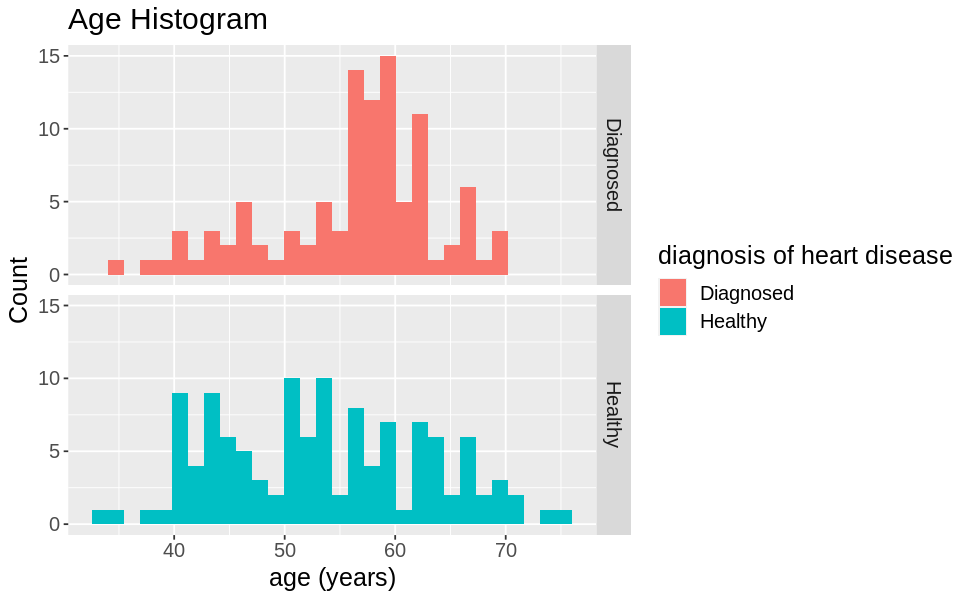

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



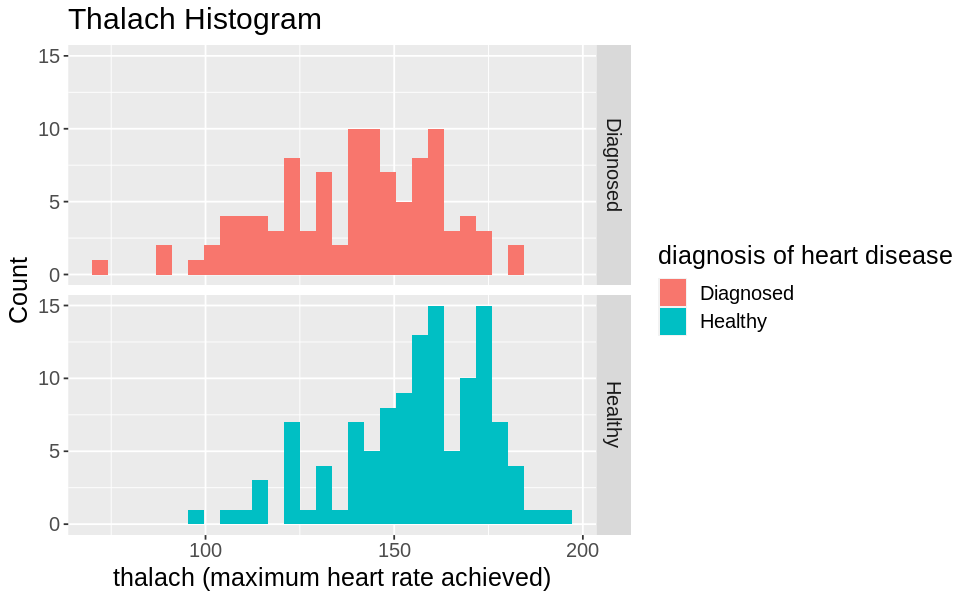

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



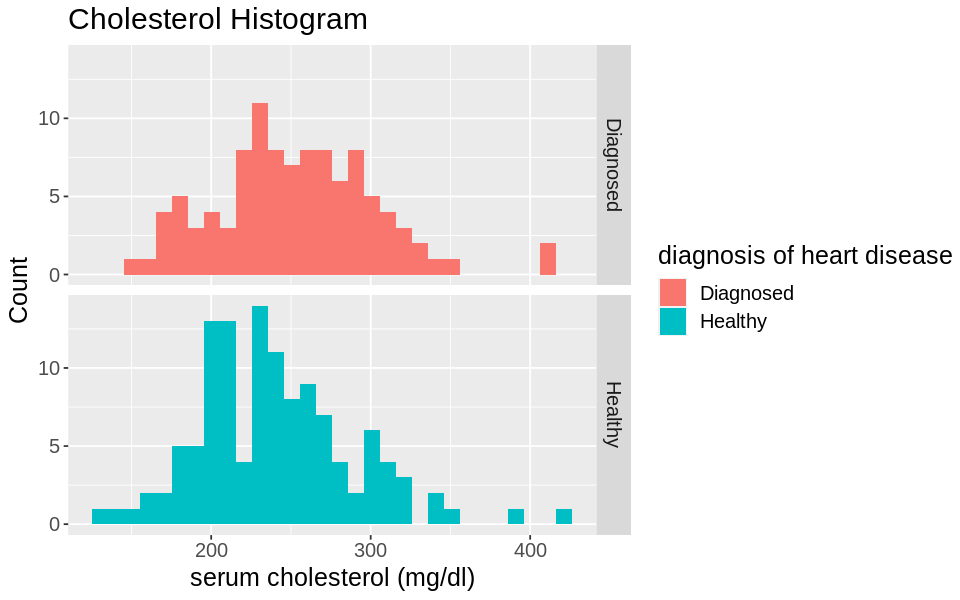

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



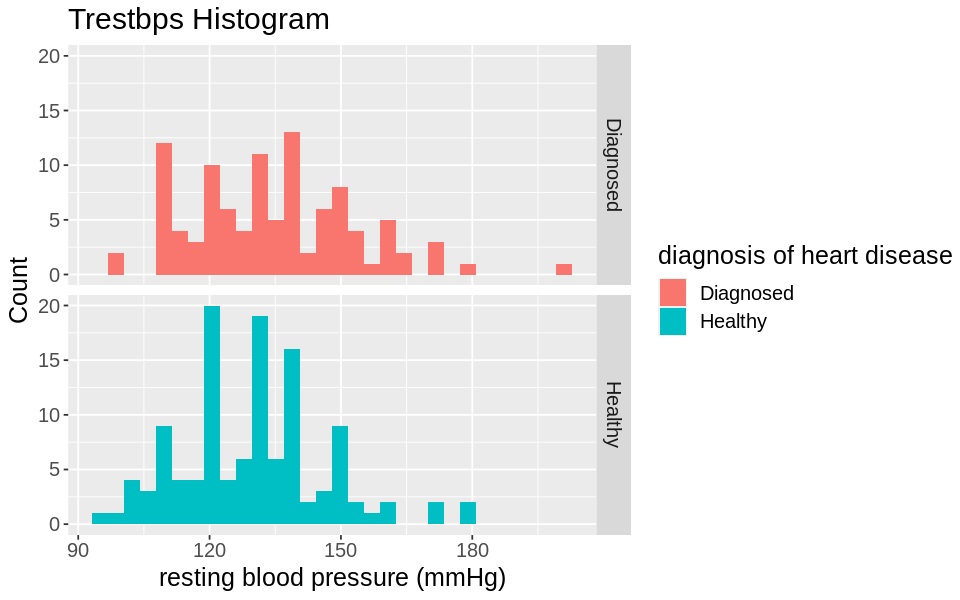

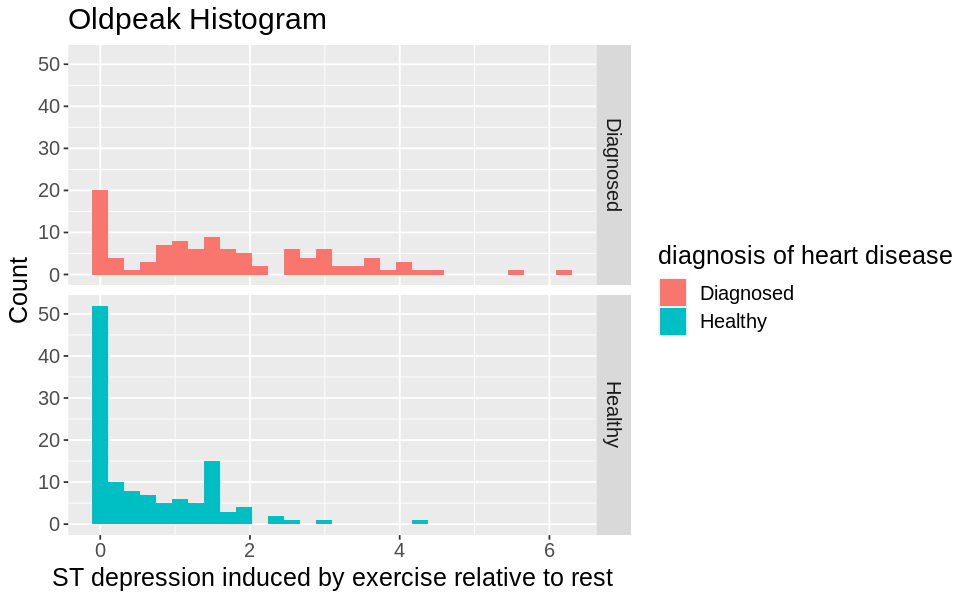

In [28]:
options(repr.plot.width = 8, repr.plot.height = 5)

## Histogram for variable "age" on training data
age_histogram = data_train %>%
        ggplot(aes(x = age, fill = target)) +
        geom_histogram() +
        labs(x = "age (years)", y = "Count", fill = "diagnosis of heart disease") + 
         ggtitle("Age Histogram") +
        theme(text = element_text(size = 15)) +
        facet_grid(rows = vars(target))
age_histogram

## Histogram for variable "thalach" on training data
thalach_histogram = data_train %>%
        ggplot(aes(x = thalach, fill = target)) +
        geom_histogram() +
        labs(x = "thalach (maximum heart rate achieved)", y = "Count", fill = "diagnosis of heart disease") + 
        ggtitle("Thalach Histogram") +
        theme(text = element_text(size = 15)) + 
        facet_grid(rows = vars(target))
thalach_histogram

## Histogram for variable "chol" on training data
chol_histogram = data_train %>%
        ggplot(aes(x = chol, fill = target)) +
        geom_histogram() +
        labs(x = "serum cholesterol (mg/dl)", y = "Count", fill = "diagnosis of heart disease") + 
        ggtitle("Cholesterol Histogram") +
        theme(text = element_text(size = 15)) + 
        facet_grid(rows = vars(target))
chol_histogram

## Histogram for variable "trestbps" on training data
trestbps_histogram = data_train %>%
        ggplot(aes(x = trestbps, fill = target)) +
        geom_histogram() +
        labs(x = "resting blood pressure (mmHg)", y = "Count", fill = "diagnosis of heart disease") + 
        ggtitle("Trestbps Histogram") +
        theme(text = element_text(size = 15)) + 
        facet_grid(rows = vars(target))
trestbps_histogram

## Histogram for variable "oldpeak" on training data
oldpeak_histogram = data_train %>%
        ggplot(aes(x = oldpeak, fill = target)) +
        geom_histogram() +
        labs(x = "ST depression induced by exercise relative to rest", y = "Count", fill = "diagnosis of heart disease") + 
        ggtitle("Oldpeak Histogram") +
        theme(text = element_text(size = 15)) + 
        facet_grid(rows = vars(target))
oldpeak_histogram

As we can see, some of the variables have a bigger difference in shape and center of the distribution comparing the Diagnosed vs Healthy obsertations. This is the case for `age`, `thalach` and `oldpeak`.

For `age`, we can see that for Diagnosed group the distribution has a higher concentration of values in the higher numbers while the Healthy is more distributed. For `thalach`, the opposite happens. And for `oldpeak`, theres more observations in the lower part compared to Diagnosed.

Having more different histograms between the 2 classes will help the model differenciate between Diagnosed and Healthy labels, so this is why we choose this 3 variables for our model.

### Data Analysis

Now we perform perform the actual Data Analysis. For this, we would like to use the classification model. Based on the data, the column num ranges from 0-4, these numbers represent the severity of all coronary artery blockages, the more blockage, the less blood flow to the heart. 0 in this case indicating < 50% diameter narrowing, and 1 to 4 indicating > 50% diameter narrowing. In this data set, the cutoff for a diagnose of heart disease is at 50% diameter narrowing, so any number greater than 1 indicates the individual have a heart disease to some extent. Therefore we decide to classify the condition of the observation into healthy (num==0), and diagnosed (num==1, 2, 3, 4), which makes a classification model the best fit as we are classifying an observation as healthy or diagnosed. After analyzing the data visualization above, we decide to use `age`, `oldpeak`, and `thalach` as  the three predicting variables used to determine the best k value. We firstly perform a cross-validation in R using the `vfold_cv` function and perform 5-fold cross-validation. We then perform K-nearest neighbor model specification and insert `tune` for `neighbors` argument. After performing workflow analysis, `accuracy` is being filtered and we create a line plot  with `neighbors` on the x-axis and the `mean` on the y-axis. 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6498990,5,0.02306340,Model01
3,accuracy,binary,0.6768687,5,0.01642183,Model02
4,accuracy,binary,0.6723232,5,0.01818631,Model03
6,accuracy,binary,0.7128283,5,0.02106951,Model04
7,accuracy,binary,0.6854545,5,0.04124825,Model05
9,accuracy,binary,0.7127273,5,0.02359154,Model06
11,accuracy,binary,0.6991919,5,0.03058647,Model07
12,accuracy,binary,0.6991919,5,0.03058647,Model08
13,accuracy,binary,0.7038384,5,0.02844407,Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,binary,0.7128283,5,0.02106951,Model04


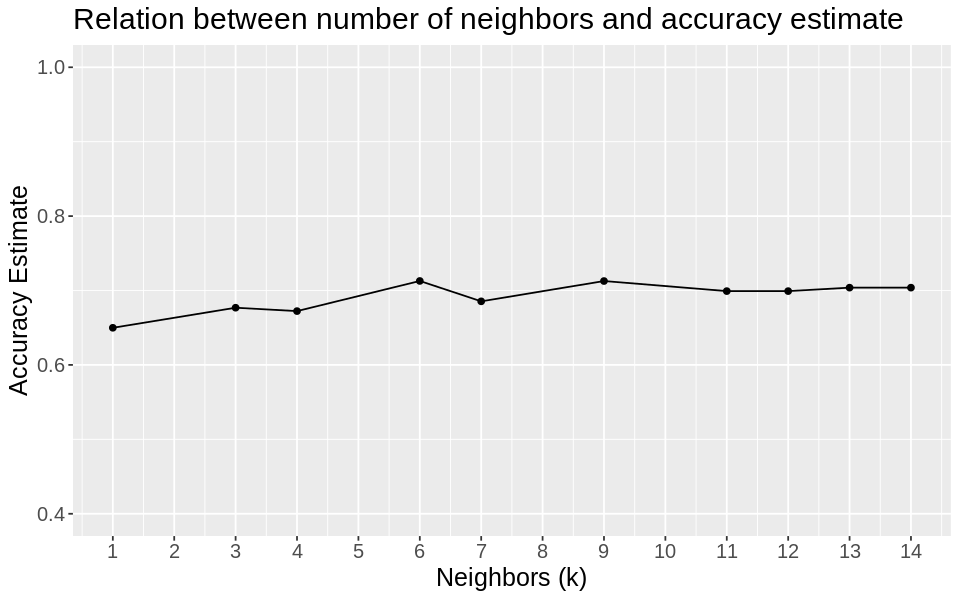

In [46]:
## Set the seed for reproducibility
set.seed(9999) 

## create a recipe for the model indicating the variables used to predict target and the data to train
recipe <- recipe(target ~ age + oldpeak + thalach, data = data_train)

## create the cross validation folds
vfold <- vfold_cv(data_train, v = 5, strata = target)

## create a model specification for our cross validation analysis
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification") 

## create the workflow with the recipe, the model specification and create the cross validation folds from it
knn_results <- workflow() %>%
       add_recipe(recipe) %>%
       add_model(knn_tune) %>%
       tune_grid(resamples = vfold, grid = 10) %>%
       collect_metrics()

## get the accuracies for every fold
accuracies <- knn_results %>% 
       filter(.metric == "accuracy")
accuracies

## get the row corresponding to the highest achieved accuracy throghout the folds
max_accuracy <- accuracies %>% filter(mean == max(mean))
max_accuracy

## create a plot to see how the accuracy relates to the number of neighbors throughut the folds
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors (k)", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) + # adjusting the y-axis
       ggtitle("Relation between number of neighbors and accuracy estimate") +
       theme(text = element_text(size = 15))

cross_val_plot

Based on the line plot above, we find that k=6 give us the best accuracy, which is around 71.3%. At the same time from the above table, we can see that by changing k to a nearby value of 4 or 7 does not change the accuracy by a large amount. Furthermore, the cost of training the model is not prohibitive at k=6. Therefore we perform K-nearest neighbor model specification using k=6 on data_test to figure out the accuracy of our model.

In [47]:
## get the best k into a variable (k=6)
k_best <- max_accuracy %>%
       pull(neighbors)

## build a new model specification using the k we have obtained as best
knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) %>%
       set_engine("kknn") %>%
       set_mode("classification") 

## create a new workflow with the best model spec
knn_results_best <- workflow() %>%
       add_recipe(recipe) %>%
       add_model(knn_best) %>%
       fit(data_train)

## predict with the new workflow on the test data
test_predictions <- predict(knn_results_best , data_test) %>%
       bind_cols(data_test) 

## evaluate our final model
prediction_accuracy <- test_predictions %>%
       metrics(truth = target, estimate = .pred_class) %>%
       filter(.metric == "accuracy") 

prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6621622


As we can see, the accuracy obtained from the test data is a bit lower than the one we got from the best k on our train data (66.2% now compared to 71.3% before). That is normal and should not concern us, as the data is different from one data set to another, and the accuracy we get from finding our best k is not guaranteed to hold for our testing dataset evaluation of the model.

## **Discussion**


* **summarize what you found:**

Regarding our original question, if it is possible to predict whether someone will be diagnosed with heart disease (Healthy or Diagnosed) based on `age`, `thalach`, and `oldpeak`, we can confirm that it is in fact possible. Although the model we created does not have a high accuracy as of what we would have liked, it does correctly point out in more than half the cases when a heart has been diagnosed with a heart disease.

From the histogram plots of our variables, we found that the best predictor variables to use would be `age`, `thalach`, and `oldpeak` since their histograms comparing the "Diagnosed" cases and the "Healthy" ones were more different between healthy vs diagnosed than the rest of the variables. With the cross validation we found that the best number of neighbours for our model would be `k=6` (which we can visualize in the plot corresponding to the highest peak of the graph), and with this k we created our best model, obtaining an accuracy of 66,2%.


* **discuss whether this is what you expected to find?**

The accuracy of 66.2% suggest that diagnosing heart disease is possible based on `age`, `thalach`, and `oldpeak`, aligning with our expectations and the histograms of the three predictors against target (healthy or diagnosed).


* **discuss what impact could such findings have?**

These findings can be used by the doctor during medical check ups to warm patients that are at high risks of heart disease and may need further examinations and tests. If we are able to further improve this model and make it have a higher accuracy, it may one day be used as a substitute for diagnosing heart disease. At the same time, our findings prove that there is a correlation between heart disease and the three predictors we choose (`age`, `thalach`, and `oldpeak`), future research can be based on our findings to discover if a causation is present, and extend to prevention of heart disease at an early stage based on indications these three predictors. 


* **discuss what future questions could this lead to?**

Our project's accuracy is not as high as we would have liked, so future analyses can be done on whether there are any categories that can predict heart disease with a higher accuracy. Our project was also done on the Cleveland data set, however there is also data for Hungary, Switzerland, and the VA Long Beach. Further analysis can be done to see if the same 3 categories of `age`, `thalach`, and `oldpeak` have a smilar accuracy in predicting whether someone has heart disease or not in data collected in other regions. 

## **References**

* Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science. https://archive.ics.uci.edu/ml/datasets/Heart+Disease
* Textbook: Timbers, T., Campbell, T., & Lee, Melissa. (2022). Data Science: A First Introduction. Chapman and Hall/CRC. https://datasciencebook.ca/
* Durage, P. M. (2018) Predicting a Person Diagnose a Heart Disease based on Cleveland Database. RPubs by RStudio. https://rpubs.com/praneetha/predicting_diagnosis_of_a_heart_disease-phase1